과대적합 문제 해결 :  Dropout
    
    - 특성이 많은 데이터
    
    - 신경망층을 깊게 쌓은 경우
    - epoch를 많이 하는 경우
    

In [34]:
import pandas as pd
#header - None : 특성이 없는 데이터의 경우 특성 이름을 달아줌

In [35]:
sonar  = pd.read_csv('sonar.csv', header = None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [36]:
X = sonar.iloc[:,:-1]
y = sonar.iloc[:, -1]

X.shape, y.shape

((208, 60), (208,))

In [37]:
# y의 클래스 수
#2개
y.unique()

array(['R', 'M'], dtype=object)

In [38]:
y = pd.get_dummies(y)
y.shape

(208, 2)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156, 2), (52, 2))

In [41]:
import numpy as np
import tensorflow as tf

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

#입력층
model1.add(Dense(100, input_dim = 60, activation = 'relu'))
model1.add(Dropout(0.5))

#은닉층
model1.add(Dense(240, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(120, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(60, activation = 'relu'))
model1.add(Dropout(0.5))

#출력층
model1.add(Dense(2, activation = 'softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               6100      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 240)               24240     
_________________________________________________________________
dropout_9 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 120)               28920     
_________________________________________________________________
dropout_10 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 60)               

In [43]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [44]:
history1 = model1.fit(X_train, y_train,
                     epochs = 100, batch_size = 5,
                     validation_data = [X_test, y_test])


Train on 156 samples, validate on 52 samples
Epoch 1/100
156/156 [==============================] - 1s 4ms/sample - loss: 0.7440 - accuracy: 0.4295 - val_loss: 0.6960 - val_accuracy: 0.5192
Epoch 2/100
156/156 [==============================] - 0s 446us/sample - loss: 0.7184 - accuracy: 0.5513 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/100
156/156 [==============================] - 0s 448us/sample - loss: 0.7135 - accuracy: 0.4872 - val_loss: 0.6904 - val_accuracy: 0.5192
Epoch 4/100
156/156 [==============================] - 0s 436us/sample - loss: 0.7110 - accuracy: 0.5128 - val_loss: 0.6897 - val_accuracy: 0.5192
Epoch 5/100
156/156 [==============================] - 0s 428us/sample - loss: 0.6433 - accuracy: 0.6410 - val_loss: 0.6835 - val_accuracy: 0.5192
Epoch 6/100
156/156 [==============================] - 0s 441us/sample - loss: 0.6810 - accuracy: 0.5705 - val_loss: 0.6784 - val_accuracy: 0.5577
Epoch 7/100
156/156 [==============================] - 0s 448us/sample - lo

156/156 [==============================] - 0s 435us/sample - loss: 0.2440 - accuracy: 0.9103 - val_loss: 0.5382 - val_accuracy: 0.8269
Epoch 57/100
156/156 [==============================] - 0s 428us/sample - loss: 0.2642 - accuracy: 0.8654 - val_loss: 0.4077 - val_accuracy: 0.8269
Epoch 58/100
156/156 [==============================] - 0s 428us/sample - loss: 0.2576 - accuracy: 0.8718 - val_loss: 0.4323 - val_accuracy: 0.8269
Epoch 59/100
156/156 [==============================] - 0s 435us/sample - loss: 0.3157 - accuracy: 0.8846 - val_loss: 0.5730 - val_accuracy: 0.7692
Epoch 60/100
156/156 [==============================] - 0s 428us/sample - loss: 0.2191 - accuracy: 0.9103 - val_loss: 0.4726 - val_accuracy: 0.7692
Epoch 61/100
156/156 [==============================] - 0s 424us/sample - loss: 0.2674 - accuracy: 0.8782 - val_loss: 0.4550 - val_accuracy: 0.8077
Epoch 62/100
156/156 [==============================] - 0s 428us/sample - loss: 0.2089 - accuracy: 0.9231 - val_loss: 0.5360 

In [45]:
tf.__version__

'2.1.0'

In [46]:
print('훈련점수 :', model1.evaluate(X_train,y_train))
print('테스트점수 : ', model1.evaluate(X_test, y_test))

156/156 [==============================] - 0s 58us/sample - loss: 0.0748 - accuracy: 0.9936
훈련점수 : [0.07480380426232631, 0.99358976]
52/52 [==============================] - 0s 114us/sample - loss: 0.4452 - accuracy: 0.8269
테스트점수 :  [0.4451563862653879, 0.8269231]


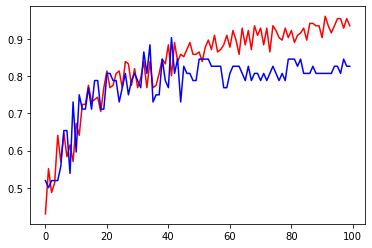

In [47]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

acc_len = np.arange(len(acc))

plt.plot(acc_len, acc, c = 'red')
plt.plot(acc_len, val_acc, c = 'blue')

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model2 = Sequential()

#입력층
model2.add(Dense(100, input_dim = 60, activation = 'relu'))
model2.add(Dropout(0.5))

#은닉층
model2.add(Dense(240, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(120, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(60, activation = 'relu'))
model2.add(Dropout(0.5))

#출력층
model2.add(Dense(2, activation = 'softmax'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               6100      
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 240)               24240     
_________________________________________________________________
dropout_13 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               28920     
_________________________________________________________________
dropout_14 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 60)               

In [50]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [55]:
history2 = model2.fit(X_train, y_train,
                     epochs = 200, batch_size = 5,
                     validation_data = [X_test, y_test])

Train on 156 samples, validate on 52 samples
Epoch 1/200
156/156 [==============================] - 0s 630us/sample - loss: 0.1210 - accuracy: 0.9615 - val_loss: 0.7538 - val_accuracy: 0.8077
Epoch 2/200
156/156 [==============================] - 0s 431us/sample - loss: 0.1325 - accuracy: 0.9423 - val_loss: 0.9295 - val_accuracy: 0.8269
Epoch 3/200
156/156 [==============================] - 0s 428us/sample - loss: 0.1623 - accuracy: 0.9423 - val_loss: 0.7559 - val_accuracy: 0.8462
Epoch 4/200
156/156 [==============================] - 0s 416us/sample - loss: 0.1399 - accuracy: 0.9295 - val_loss: 0.8426 - val_accuracy: 0.8077
Epoch 5/200
156/156 [==============================] - 0s 422us/sample - loss: 0.2042 - accuracy: 0.8846 - val_loss: 0.7542 - val_accuracy: 0.8077
Epoch 6/200
156/156 [==============================] - 0s 422us/sample - loss: 0.1330 - accuracy: 0.9487 - val_loss: 0.8415 - val_accuracy: 0.7500
Epoch 7/200
156/156 [==============================] - 0s 422us/sample - 

156/156 [==============================] - 0s 409us/sample - loss: 0.1774 - accuracy: 0.9423 - val_loss: 1.3660 - val_accuracy: 0.8269
Epoch 57/200
156/156 [==============================] - 0s 416us/sample - loss: 0.0954 - accuracy: 0.9487 - val_loss: 1.1034 - val_accuracy: 0.8269
Epoch 58/200
156/156 [==============================] - 0s 416us/sample - loss: 0.0547 - accuracy: 0.9808 - val_loss: 1.5012 - val_accuracy: 0.8269
Epoch 59/200
156/156 [==============================] - 0s 416us/sample - loss: 0.0814 - accuracy: 0.9679 - val_loss: 1.1207 - val_accuracy: 0.8077
Epoch 60/200
156/156 [==============================] - 0s 422us/sample - loss: 0.1024 - accuracy: 0.9423 - val_loss: 0.9856 - val_accuracy: 0.8462
Epoch 61/200
156/156 [==============================] - 0s 428us/sample - loss: 0.1123 - accuracy: 0.9744 - val_loss: 1.3592 - val_accuracy: 0.8077
Epoch 62/200
156/156 [==============================] - 0s 409us/sample - loss: 0.1345 - accuracy: 0.9359 - val_loss: 1.0987 

156/156 [==============================] - 0s 435us/sample - loss: 0.0981 - accuracy: 0.9551 - val_loss: 1.3364 - val_accuracy: 0.8269
Epoch 112/200
156/156 [==============================] - 0s 416us/sample - loss: 0.1033 - accuracy: 0.9551 - val_loss: 1.6980 - val_accuracy: 0.8462
Epoch 113/200
156/156 [==============================] - 0s 409us/sample - loss: 0.1255 - accuracy: 0.9487 - val_loss: 1.0631 - val_accuracy: 0.7885
Epoch 114/200
156/156 [==============================] - 0s 416us/sample - loss: 0.1345 - accuracy: 0.9231 - val_loss: 1.1739 - val_accuracy: 0.8462
Epoch 115/200
156/156 [==============================] - 0s 416us/sample - loss: 0.1206 - accuracy: 0.9487 - val_loss: 1.4925 - val_accuracy: 0.8269
Epoch 116/200
156/156 [==============================] - 0s 416us/sample - loss: 0.0872 - accuracy: 0.9679 - val_loss: 1.6360 - val_accuracy: 0.8077
Epoch 117/200
156/156 [==============================] - 0s 412us/sample - loss: 0.0972 - accuracy: 0.9679 - val_loss: 1

156/156 [==============================] - 0s 409us/sample - loss: 0.0236 - accuracy: 0.9936 - val_loss: 2.0057 - val_accuracy: 0.8269
Epoch 167/200
156/156 [==============================] - 0s 416us/sample - loss: 0.1400 - accuracy: 0.9551 - val_loss: 1.3775 - val_accuracy: 0.8077
Epoch 168/200
156/156 [==============================] - 0s 409us/sample - loss: 0.0745 - accuracy: 0.9679 - val_loss: 2.0331 - val_accuracy: 0.8077
Epoch 169/200
156/156 [==============================] - 0s 409us/sample - loss: 0.0907 - accuracy: 0.9744 - val_loss: 1.7876 - val_accuracy: 0.8269
Epoch 170/200
156/156 [==============================] - 0s 409us/sample - loss: 0.0745 - accuracy: 0.9551 - val_loss: 2.0318 - val_accuracy: 0.8077
Epoch 171/200
156/156 [==============================] - 0s 409us/sample - loss: 0.0990 - accuracy: 0.9487 - val_loss: 1.3437 - val_accuracy: 0.8462
Epoch 172/200
156/156 [==============================] - 0s 409us/sample - loss: 0.0620 - accuracy: 0.9744 - val_loss: 1

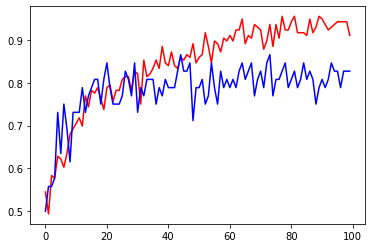

In [52]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

acc_len = np.arange(len(acc))

plt.plot(acc_len, acc, c = 'red')
plt.plot(acc_len, val_acc, c = 'blue')

In [53]:
print('훈련점수 :', model1.evaluate(X_train,y_train))
print('테스트점수 : ', model1.evaluate(X_test, y_test))

156/156 [==============================] - 0s 172us/sample - loss: 0.0748 - accuracy: 0.9936
훈련점수 : [0.07480380426232631, 0.99358976]
52/52 [==============================] - 0s 96us/sample - loss: 0.4452 - accuracy: 0.8269
테스트점수 :  [0.4451563862653879, 0.8269231]


In [54]:
print('훈련점수 :', model2.evaluate(X_train,y_train))
print('테스트점수 : ', model2.evaluate(X_test, y_test))

156/156 [==============================] - 0s 70us/sample - loss: 0.0465 - accuracy: 0.9936
훈련점수 : [0.046496647147414014, 0.99358976]
52/52 [==============================] - 0s 134us/sample - loss: 0.7202 - accuracy: 0.8269
테스트점수 :  [0.7202350726494422, 0.8269231]
